In [1]:
import sys
import pprint
pprint.pprint(sys.path)
sys.path.append('/home/ksato/ExternalSSD1T/anaconda3/envs/for_tabian/lib/python3.8/site-packages/')

['/home/ksato/dev/tabian/pca_test',
 '',
 '/opt/ros/foxy/lib/python3.8/site-packages',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '/home/ksato/.local/lib/python3.8/site-packages',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3/dist-packages/IPython/extensions',
 '/home/ksato/.ipython']


In [2]:
# -*- coding: utf-8 -*-

import cv2
import numpy as np
import matplotlib.pyplot as plt 

# 画像１
img1 = cv2.imread("./images/tokino-kane1.png")
img2 = cv2.imread("./images/tokino-kane2.jpg")
img3 = cv2.imread("./images/tokino-kane3.jpg")
img4 = cv2.imread("./images/tokino-kane4.jpg")
# 画像２
# img2 = cv2.imread("img2.jpg")

# A-KAZE検出器の生成
detector = cv2.AKAZE_create()

In [3]:
# matcher = cv2.BFMatcher(cv2.NORM_HAMMING)
matcher = cv2.BFMatcher()

In [4]:
kp1, desc1 = detector.detectAndCompute(img1, None)
kp2, desc2 = detector.detectAndCompute(img2, None)
kp3, desc3 = detector.detectAndCompute(img3, None)
kp4, desc4 = detector.detectAndCompute(img4, None)

In [5]:
print(desc1.shape)
print(desc2.shape)
print(desc3.shape)
print(desc4.shape)

(16523, 61)
(6753, 61)
(2091, 61)
(8861, 61)


In [6]:
matcher = cv2.BFMatcher()
matches = matcher.knnMatch(desc1, desc4, k=2)

In [36]:
matched_idx_kp_dict = {}
lowes_ratio = 0.75
for idx, (m, n) in enumerate(matches):
    if m.distance < lowes_ratio * n.distance:
        matched_idx_kp_dict[idx] = m, n
matched_idx_list = list(matched_idx_kp_dict.keys())
matched_keypoints = [[m, n] for m, n in matched_idx_kp_dict.values()]
matched_keypoints = sorted(matched_keypoints, key = lambda x:x[0].distance)

In [37]:
print(len(matched_keypoints))
# print(matched_keypoints)

70


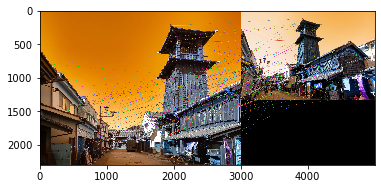

In [38]:
knn_img = cv2.drawMatchesKnn(img1, kp1, img4, kp4, matched_keypoints, None, flags=2)
# knn_img = cv2.resize(knn_img, dsize=None, fx=2.0, fy=2.0)
plt.imshow(knn_img)
plt.show()

In [39]:
import pandas as pd

In [40]:
   
# idx_list
matched_desc1_list = []
# print(dir(cv2.KeyPoint))
for idx, curr_desc1 in enumerate(desc1):
    if idx in matched_idx_list:
        matched_desc1_list.append(curr_desc1)
    
matched_df1 = pd.DataFrame(matched_desc1_list)
# df2 = pd.DataFrame(desc2)

In [41]:
matched_df1.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0,240,5,0,128,55,1,199,227,0,...,16,255,125,226,197,199,227,253,255,15
1,64,233,1,0,0,16,192,54,73,254,...,0,15,248,225,195,195,255,121,255,7
2,160,18,0,0,128,1,56,253,255,7,...,0,112,248,225,193,195,243,253,255,3
3,112,93,2,40,127,153,188,118,27,218,...,140,100,246,251,3,0,216,255,68,31
4,216,23,2,24,78,0,184,253,63,3,...,140,127,254,241,1,0,248,255,191,48


In [42]:
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

In [43]:
# 標準化
dfs = matched_df1.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)

In [73]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs)
# データを主成分空間に写像
feature = pca.transform(dfs)

In [77]:
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,2.713488,-2.801630,-2.012635,-0.367864,0.525557,1.319984,2.579511,-0.184552,-1.056291,2.276031,...,-0.262983,-0.037732,0.033197,0.037878,0.034002,-0.042664,0.032559,0.050927,0.035401,0.048050
1,0.192734,-1.888766,4.484849,-0.187260,1.446736,0.496091,-1.460233,-0.388944,-1.745396,-0.042376,...,0.424352,0.320905,-0.132692,-0.209110,-0.100731,-0.198920,0.044135,-0.219865,-0.022863,-0.054015
2,-1.416218,-2.865136,-3.000181,-1.657502,1.782383,0.104676,-0.276418,-1.087710,-1.940984,2.462795,...,0.114195,-0.277202,0.080173,-0.037617,-0.196626,-0.177230,0.076100,0.018008,-0.034446,-0.081841
3,-0.706538,-0.175159,0.639538,3.698502,-2.693725,0.134365,-1.745339,-1.689269,-1.730365,-0.893403,...,-0.125408,-0.099842,0.103884,-0.197983,0.093284,0.124582,0.060241,-0.018069,-0.005933,-0.014105
4,-4.342778,-2.889188,-0.836170,2.101181,-0.763266,1.638988,-0.979429,1.230377,1.163577,-0.200926,...,-0.022300,0.037638,0.057718,-0.000635,0.016556,0.103986,-0.017439,0.048277,-0.049108,-0.009557


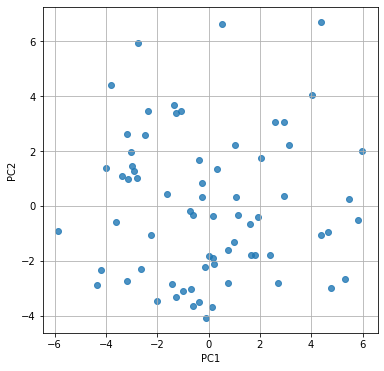

In [78]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
# plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(matched_df1.iloc[:, 5]))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [79]:
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,0.129124
PC2,0.115135
PC3,0.101701
PC4,0.075522
PC5,0.070763
PC6,0.046508
PC7,0.044077
PC8,0.041025
PC9,0.035697
PC10,0.034857


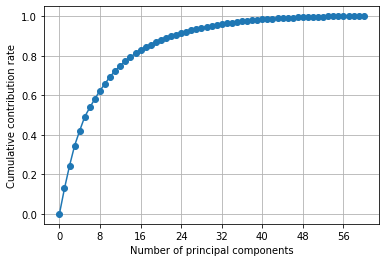

In [80]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()